**Transfer Learning**


* Keras contains pretrained models for image classification which are trained on Imagenet data. 
* Imagenet is a large collection of image data containing 1000 categories of images. 
* These pretrained models are capable of classifying any image that falls into these 1000 categories of images.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive/My Drive/ComputerVision_Shared/Transfer_Learning_Code/'

flower_photos		Transfer_Learning.ipynb
Load_Saved_model.ipynb	Transfer_Learning_SportsCelebData.ipynb
TL_model.h5		Untitled0.ipynb


In [ ]:
dataset_path = '/content/drive/My Drive/ComputerVision_Shared/Transfer_Learning_Code/flower_photos/'

In [ ]:
seed_value = 0

import os
os.environ['PYTHONHASHSEED']=str(seed_value)

import random
random.seed(seed_value)

import cv2

import numpy as np
np.random.seed(seed_value)

import tensorflow as tf
tf.random.set_seed(seed_value)

import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

**Load the Data**

In [ ]:
# lists to hold data

images = []
labels = []

In [ ]:
# listing all folder names in the specified path
folders = os.listdir(dataset_path)
folders

['sunflowers', 'tulips', 'dandelion', 'daisy', 'roses']

In [ ]:
# Creating dictionaries to map folder names
count = 0
name_mapping_dict = dict()

for folder_name in folders:
  name_mapping_dict[folder_name] = count
  count += 1


name_mapping_dict

{'daisy': 3, 'dandelion': 2, 'roses': 4, 'sunflowers': 0, 'tulips': 1}

In [ ]:
inv_name_mapping_dict =  {v: k for k, v in name_mapping_dict.items()}

print(inv_name_mapping_dict)

{0: 'sunflowers', 1: 'tulips', 2: 'dandelion', 3: 'daisy', 4: 'roses'}


In [ ]:
# Setting image size
img_size = 192

**Pre-process dataset**

In [ ]:
# looping through each folder and getting images and creating labels
for folder in folders:
  print(f'Processing folder: {folder}')
  filenames = os.listdir(dataset_path+folder+'/')

  for fname in filenames:
    img = plt.imread(dataset_path+folder+'/'+fname)
    img = cv2.resize(img, (img_size, img_size))
    images.append(img)
    labels.append(name_mapping_dict[folder])

Processing folder: sunflowers
Processing folder: tulips
Processing folder: dandelion
Processing folder: daisy
Processing folder: roses


In [ ]:
# Converting lists to numpy arrays for easy matrix operations
images = np.array(images)
labels = np.array(labels)

In [ ]:
print('images shape : ', images.shape)
print('labels shape : ', labels.shape)

images shape :  (3670, 192, 192, 3)
labels shape :  (3670,)


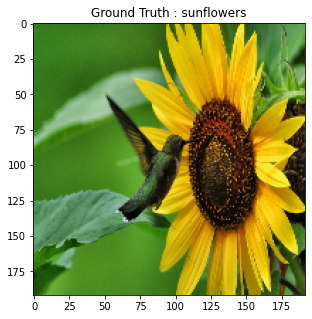

In [ ]:
# Plotting samples from data to check if data has been read successfully
img_number = 65
plt.figure(figsize=[10,5])
plt.imshow(images[img_number,:,:])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[labels[img_number]]))
plt.show()

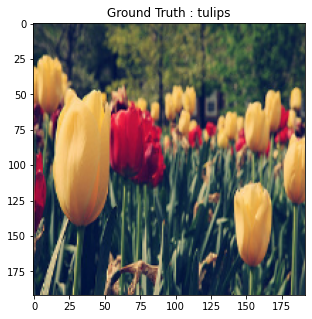

In [ ]:
# Plotting samples from data to check if data has been read successfully
img_number = 705
plt.figure(figsize=[10,5])
plt.imshow(images[img_number,:,:])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[labels[img_number]]))
plt.show()

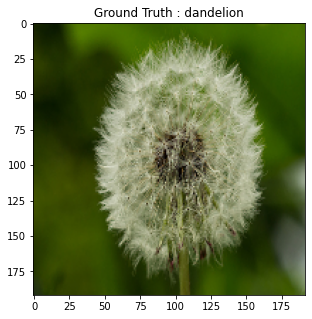

In [ ]:
# Plotting samples from data to check if data has been read successfully
img_number = 2105
plt.figure(figsize=[10,5])
plt.imshow(images[img_number,:,:])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[labels[img_number]]))
plt.show()

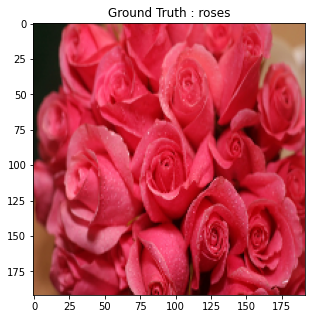

In [ ]:
# Plotting samples from data to check if data has been read successfully
img_number = 3400
plt.figure(figsize=[10,5])
plt.imshow(images[img_number,:,:])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[labels[img_number]]))
plt.show()

In [ ]:
# Find the unique numbers from the train labels
classes = np.unique(labels)
classes_num = len(classes)
print('Total number of outputs : ', classes_num)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


In [ ]:
# Normalize training image pixels
images = np.array(images) / 255

In [ ]:
# Change the labels from integer to categorical data
labels_one_hot = to_categorical(labels)

In [ ]:
labels[303]

0

In [ ]:
labels_one_hot[303]

array([1., 0., 0., 0., 0.], dtype=float32)

**Shuffling and Splittng Dataset**

In [ ]:
# Shuffling and Splittng Dataset
from sklearn.model_selection import train_test_split

train_images, test_images, train_labels, test_labels = train_test_split(images, labels_one_hot, test_size=0.20, shuffle=True, random_state=0)


print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)

Training data shape :  (2936, 192, 192, 3) (2936, 5)
Testing data shape :  (734, 192, 192, 3) (734, 5)


**Design the Network Architecure for Convolutional Neural Network**


* Getting a pretrained Feature Extractor
* Removing its Fully-Connected layers and attaching our own (To exclude the default classifier we have to set argument include_top to false)

Attaching our own classifier

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten

"""
Pre-trained model examples are as follows:


pretrained_model = tf.keras.applications.MobileNetV2(input_shape=(img_size, img_size, 3), include_top=False)
pretrained_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False ,input_shape=(img_size, img_size, 3))
pretrained_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
pretrained_model = tf.keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
"""

pretrained_model = tf.keras.applications.MobileNetV2(input_shape=(img_size, img_size, 3), include_top=False)
pretrained_model.trainable = False

model = Sequential()
model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(classes_num, activation="softmax"))

9420800/9406464 [==============================] - 0s 0us/step




**Configure the model training time parameters**

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Train the Model**

In [ ]:
history = model.fit(train_images, train_labels, batch_size=64,  epochs=10, verbose=1, 
                   validation_data=(test_images, test_labels))

Epoch 1/10
46/46 [==============================] - 58s 1s/step - loss: 1.7391 - accuracy: 0.7486 - val_loss: 0.8333 - val_accuracy: 0.8842
Epoch 2/10
46/46 [==============================] - 58s 1s/step - loss: 0.2539 - accuracy: 0.9482 - val_loss: 0.9581 - val_accuracy: 0.8733
Epoch 3/10
46/46 [==============================] - 47s 1s/step - loss: 0.0725 - accuracy: 0.9806 - val_loss: 0.9564 - val_accuracy: 0.8924
Epoch 4/10
46/46 [==============================] - 47s 1s/step - loss: 0.0254 - accuracy: 0.9932 - val_loss: 0.9525 - val_accuracy: 0.8733
Epoch 5/10
46/46 [==============================] - 46s 1s/step - loss: 0.0184 - accuracy: 0.9959 - val_loss: 0.9720 - val_accuracy: 0.8719
Epoch 6/10
46/46 [==============================] - 47s 1s/step - loss: 0.0260 - accuracy: 0.9959 - val_loss: 1.0446 - val_accuracy: 0.8815
Epoch 7/10
46/46 [==============================] - 46s 1s/step - loss: 0.0155 - accuracy: 0.9976 - val_loss: 1.0389 - val_accuracy: 0.8692
Epoch 8/10
46/46 [==

**Evaluate the Trained Model on Testing Data**

In [ ]:
[test_loss, test_acc] = model.evaluate(test_images, test_labels)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}%".format(test_loss, test_acc*100))

23/23 [==============================] - 10s 414ms/step - loss: 1.0152 - accuracy: 0.8774
Evaluation result on Test Data : Loss = 1.0151931047439575, accuracy = 87.73841857910156%


In [ ]:
[train_loss, train_acc] = model.evaluate(train_images, train_labels)
print("Evaluation result on train Data : Loss = {}, accuracy = {}%".format(train_loss, train_acc*100))

92/92 [==============================] - 38s 409ms/step - loss: 0.0025 - accuracy: 0.9990
Evaluation result on train Data : Loss = 0.002508919918909669, accuracy = 99.89781975746155%


**Save Trained Model**

In [ ]:
model_path = '/content/drive/My Drive/ComputerVision_Shared/Transfer_Learning_Code/'

model.save(model_path+'MobileNet_flowers_model.h5')

**Display Loss and Accuracy Plots**

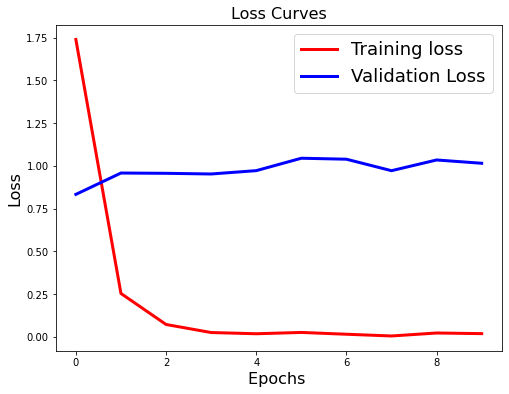

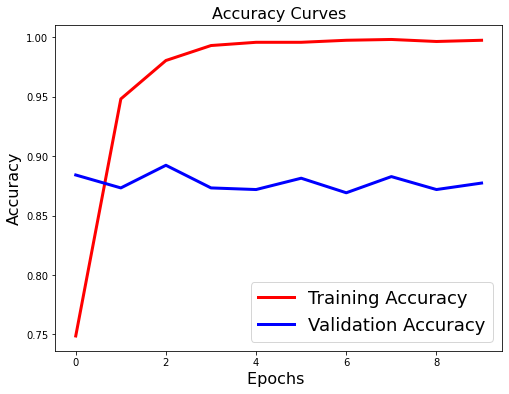

In [ ]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.show()

#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.show()

**Test the Trained Model on Testing Data: <br/>Testing a single image**

In [ ]:
def test_single_image(test_img_number):

  # make prediction
  prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
  print("Model prediction: {}".format(prediction))

  # Display the predicted image
  plt.imshow(test_images[test_img_number])
  plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
  plt.xticks([])
  plt.yticks([])
  plt.show()


Model prediction: tulips


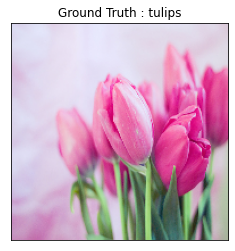

In [ ]:
test_single_image(test_img_number=0)

Model prediction: sunflowers


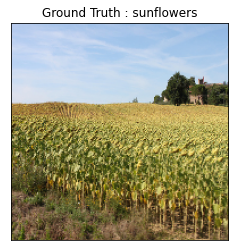

In [ ]:
test_single_image(test_img_number=1)

Model prediction: roses


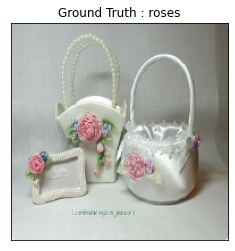

In [ ]:
test_single_image(test_img_number=3)

Model prediction: dandelion


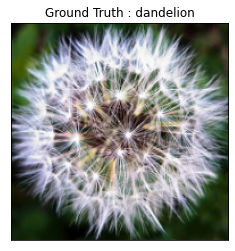

In [ ]:
test_single_image(test_img_number=4)

Model prediction: daisy


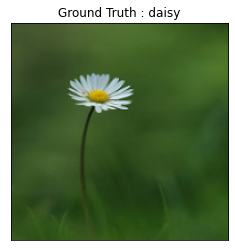

In [ ]:
test_single_image(test_img_number=5)

Model prediction: sunflowers


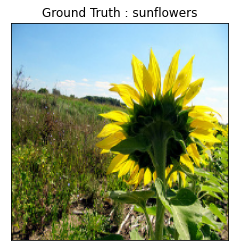

In [ ]:
test_single_image(test_img_number=6)

Model prediction: tulips


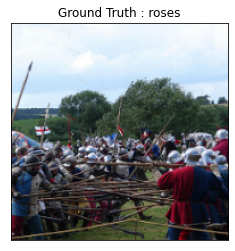

In [ ]:
test_single_image(test_img_number=7)

Model prediction: roses


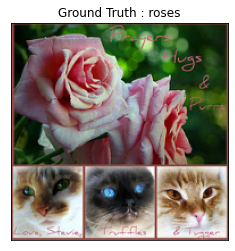

In [ ]:
test_single_image(test_img_number=10)

Model prediction: tulips


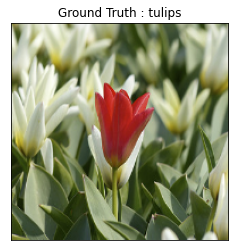

In [ ]:
test_single_image(test_img_number=201)